In [1]:
!pip install pandas numpy matplotlib seaborn sqlalchemy pymysql


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -------------------------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [5]:
import os
os.getcwd()



'C:\\Users\\anish'

In [6]:
os.listdir()


['.git',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.lesshst',
 '.matplotlib',
 '.ms-ad',
 '.streamlit',
 '.venv',
 '.vscode',
 'ab_data.csv',
 'ab_data_summary.csv',
 'ai writer.ipynb',
 'ai-writer',
 'app.py',
 'AppData',
 'Application Data',
 'breast-cancer.csv',
 'cleaned_data.csv',
 'cleaned_dataset.csv',
 'clustered_data.csv',
 'Contacts',
 'Cookies',
 'creditcard.csv',
 'Dashboard Insights.txt',
 'Documents',
 'Downloads',
 'Favorites',
 'features.csv',
 'Final Recommendation.txt',
 'final_food_delivery_dataset.csv',
 'food_delivery_analysis.ipynb',
 'forecast_output.csv',
 'forecast_report.txt',
 'fraud detection.ipynb',
 'fraud-detection',
 'Insights.txt',
 'insights.txt.txt',
 'Iris.csv',
 'library-management-system',
 'Links',
 'Local Settings',
 'Mall_Customers.csv',
 'Microsoft',
 'model.pkl',
 'Music',
 'My Documents',
 'NetHood',
 'New folder',
 'New folder (2)',
 'New folder (3)',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT

In [7]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
df.isnull().sum()



Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
df = df.dropna()   # or use fillna()


In [11]:
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [12]:
df['Date'] = pd.to_datetime(df['Date'])


In [13]:
df = df.drop_duplicates()


In [15]:
print(df.columns)



Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [16]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.columns)


Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')


In [18]:
df['Cost'] = df['Total_Amount'] * 0.7
df['Profit'] = df['Total_Amount'] - df['Cost']


In [19]:
df['Profit Margin %'] = (df['Profit'] / df['Total_Amount']) * 100
df.head()


,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Cost,Profit,Profit Margin %
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,105.0,45.0,30.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,700.0,300.0,30.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,21.0,9.0,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,350.0,150.0,30.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,70.0,30.0,30.0


In [20]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [23]:
category_analysis = df.groupby('Product_Category').agg({
    'Total_Amount': 'sum',
    'Profit': 'sum'
}).reset_index()

category_analysis['Profit Margin %'] = (
    category_analysis['Profit'] / category_analysis['Total_Amount'] * 100
)

category_analysis


,Product_Category,Total_Amount,Profit,Profit Margin %
0,Beauty,143515,43054.5,30.0
1,Clothing,155580,46674.0,30.0
2,Electronics,156905,47071.5,30.0


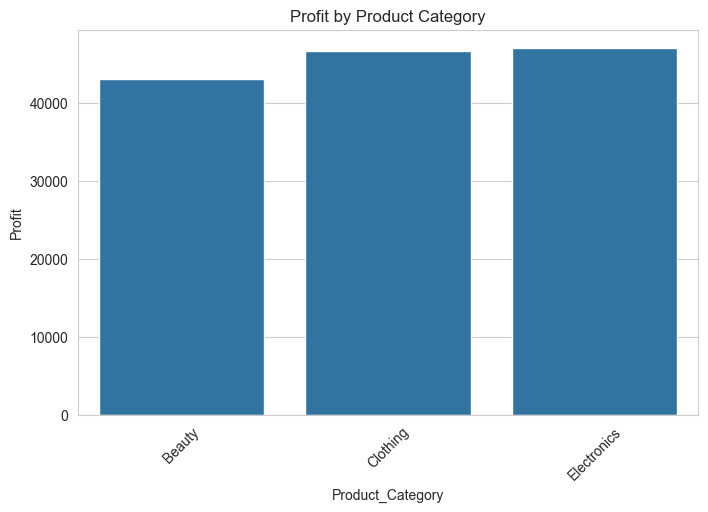

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Product_Category', y='Profit', data=category_analysis)
plt.title("Profit by Product Category")
plt.xticks(rotation=45)
plt.show()


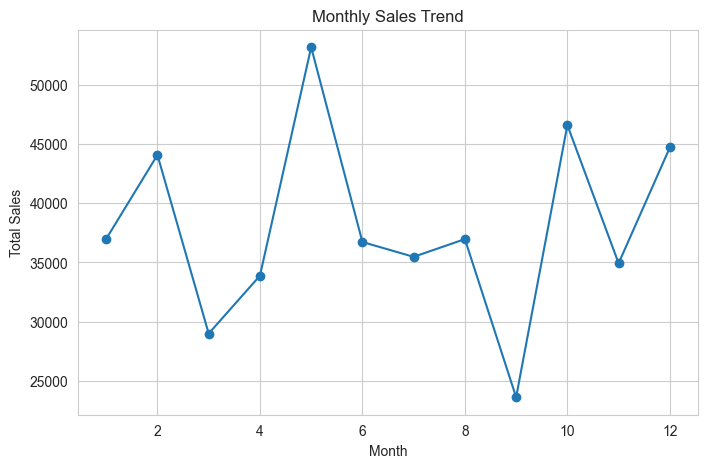

In [25]:
monthly_sales = df.groupby('Month')['Total_Amount'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [26]:
gender_analysis = df.groupby('Gender').agg({
    'Total_Amount': 'sum',
    'Profit': 'sum'
})

gender_analysis


,Total_Amount,Profit
Gender,,
Female,232840,69852.0
Male,223160,66948.0


In [27]:
df['Age Group'] = pd.cut(df['Age'],
                         bins=[0,18,30,45,60,100],
                         labels=['Teen','Young Adult','Adult','Mid Age','Senior'])


In [28]:
age_analysis = df.groupby('Age Group')['Total_Amount'].sum()
age_analysis


C:\Users\anish\AppData\Local\Temp\ipykernel_14808\1532867410.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('Age Group')['Total_Amount'].sum()


Age Group
Teen            11215
Young Adult    121730
Adult          141955
Mid Age        147875
Senior          33225
Name: Total_Amount, dtype: int64

In [29]:
correlation = df[['Quantity', 'Profit']].corr()
correlation


,Quantity,Profit
Quantity,1.000000,0.373707
Profit,0.373707,1.000000


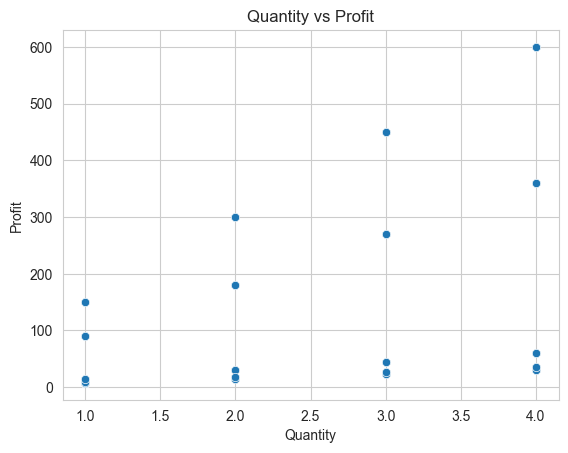

In [30]:
sns.scatterplot(x='Quantity', y='Profit', data=df)
plt.title("Quantity vs Profit")
plt.show()


In [31]:
top_categories = category_analysis.sort_values(
    by='Profit', ascending=False
).head(5)

top_categories


,Product_Category,Total_Amount,Profit,Profit Margin %
2,Electronics,156905,47071.5,30.0
1,Clothing,155580,46674.0,30.0
0,Beauty,143515,43054.5,30.0


In [32]:
df.to_csv("clean_retail_data.csv", index=False)
